Что делать
Построить 5 графиков по выбранным данным. 
Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 
Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

Откуда брать данные
Можно взять свой датасет или воспользоваться одним из приведенных ниже:
•	Данные IMDB;
•	Данные NYC;
•	Данные NBA.


In [103]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('tmdb_5000_movies.csv')
data.sort_values('vote_average', ascending=False).head()
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [107]:
#  Гипотеза №1 - Суммарный бюджет фильмов возрастал от года к году.

years = range(1910,2019)

def production_year(row):
    for year in years:
        if str(year) in str(row):
            return year
    return 1900

data['year'] = data['release_date'].apply(production_year)
data_1 = data[['year', 'budget']].groupby('year').sum().reset_index().sort_values('year')
data_1.tail()

,year,budget
86,2013,8205880834
87,2014,7368453311
88,2015,6724547367
89,2016,4753140000
90,2017,0


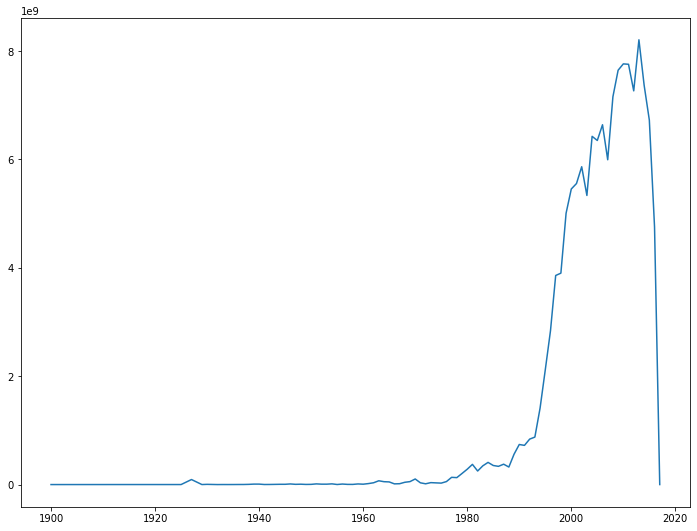

In [104]:
plt.plot(data_1['year'], data_1['budget'])

# В Визуализации участвуют 2 типа переменных - год релиза фильма и суммарный бюджет всех фильмов за этот год. Цель - посмотреть 
# как меняется суммарный бюджет всех фильмов от года к году. Выбрал такой тип графика из-за больше наглядности.

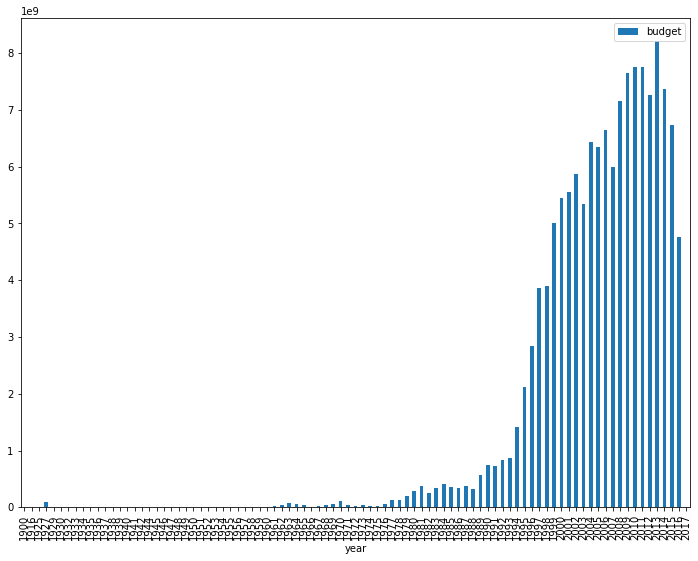

In [112]:
data_2 = data[['year', 'budget']].groupby('year').sum()
data_2.plot(kind='bar')

# использованы те же данные, что и в случае с предыдущим графиком. Но теперь график построен с помощью метода plot,
# использован атрибут bar (столбчатая диаграмма) в данном случае индексом в датафрейме выступает год.
# здесь более наглядно видна величена бюджета за каждый год, и мы можем визуально сравнить ее, на сколько она выше или ниже
# по сравнению с соседними годами.

In [113]:
import seaborn as sns

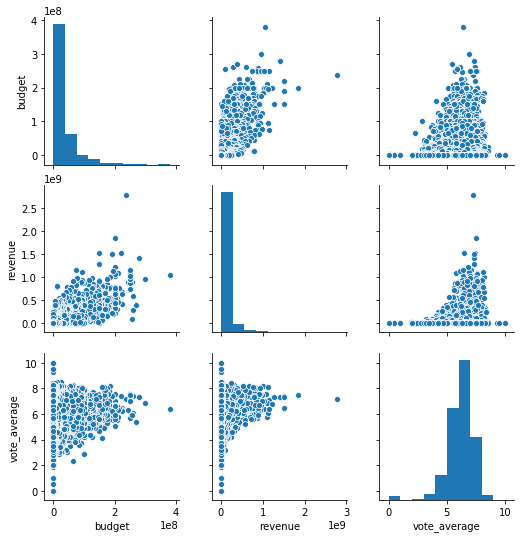

In [114]:
# Гипотеза №2. Чем выше бюджет тем больше сборы. Чем лучше отзывы о фильме, тем больше сборы.

sns_plot = sns.pairplot(
    data[['budget', 'revenue', 'vote_average']])
sns_plot

In [ ]:
# Данны график показывает нам связаны ли между собой бюджет, сборы фильма и отзывы о нем.
# Выбрал данный график, т.к. он автоматически строит все возможные пары зависимостей и представляет их на понятном графике.
# Тем самым мы видим, что большой бюджет не дает гарантии больших сборов, необходимо анализировать зависимости не только 
# этих данных. Что касается отзывов - наблюдается положительная динамика. При росте оценки фильма увеличиваются сборы.

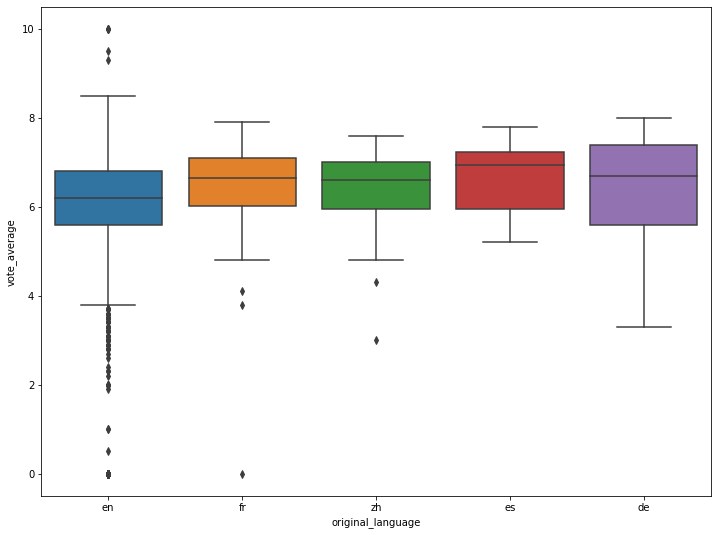

In [147]:
# Сравнение оценок зрителей в завивисимости от страны производства фильма (топ 5 стран).
# 

data_lang = data.original_language.value_counts().sort_values(ascending = False).head(5).index.values
data_lang
sns.boxplot(x="original_language", y="vote_average", 
            data=data[data.original_language.isin(data_lang)])

In [148]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [172]:
data_lang = data.original_language.value_counts().sort_values(ascending = False).head(5).index.values
data_lang

# Тот же график, но позволяющий взаимодействовать с показателями. Является более интерактивным
data_plotly = []

for lang in data_lang:
    data_plotly.append(
        go.Box(y=data[data.original_language==lang].vote_average, 
               name=lang)
    )
iplot(data_plotly, show_link = False)